# MNIST Digit Recognition with Keras

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="200"/></br>

This example uses MNIST dataset of handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flatten and converted to a 1-D numpy array of 784 features (28*28).

## Overview

![MNIST Digits](https://www.tensorflow.org/images/mnist_deep.png)

## What we will accomplish in this example:

- Create a deep convolutional neural network model for recognizing MNIST digits, based on looking at every pixel in the image
- Use Keras to train the model to recognize digits by having it "look" at thousands of examples 
- Check the model's accuracy 


In [1]:

import tempfile
import tensorflow as tf


from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, InputLayer

keras.__version__

Using TensorFlow backend.


'2.2.4-tf'

### Loading the dataset

In [2]:
batch_size = 128
num_classes = 10
epochs = 10


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


### Reshaping Data

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


('x_train shape:', (60000, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


### Creating the CNN model

In [4]:
model = Sequential()
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [6]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1,
          verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 183us/step - loss: 1.5638 - accuracy: 0.1006 - val_loss: 1.4820 - val_accuracy: 0.0983
Epoch 2/10
54000/54000 [==============================] - 3s 50us/step - loss: 1.4849 - accuracy: 0.0994 - val_loss: 1.4759 - val_accuracy: 0.0970
Epoch 3/10
54000/54000 [==============================] - 3s 50us/step - loss: 1.4800 - accuracy: 0.0990 - val_loss: 1.4735 - val_accuracy: 0.0978
Epoch 4/10
54000/54000 [==============================] - 3s 51us/step - loss: 1.4755 - accuracy: 0.0993 - val_loss: 1.4735 - val_accuracy: 0.0973
Epoch 5/10
54000/54000 [==============================] - 3s 51us/step - loss: 1.4738 - accuracy: 0.0993 - val_loss: 1.4728 - val_accuracy: 0.0975
Epoch 6/10
54000/54000 [==============================] - 3s 50us/step - loss: 1.4727 - accuracy: 0.0991 - val_loss: 1.4734 - val_accuracy: 0.0983
Epoch 7/10
54000/54000 [==============================] - 3s 51us/s

In [ ]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)            

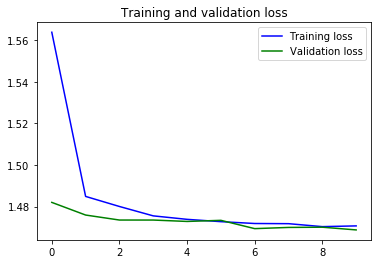

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluation

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 1.4694973865509033)
('Test accuracy:', 0.09889999777078629)


In [9]:
keras_file = 'mymodel.h5'
model.save(keras_file)
print('Saved baseline model to:', keras_file)

('Saved baseline model to:', 'mymodel.h5')
